In [1]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


 학습 데이터

In [2]:
# 지도 학습
xData = [1, 2, 3, 4, 5, 6, 7] # 하루 근무 시간
yData = [25000, 55000, 75000, 110000, 128000, 155000, 180000] # 근무 시간에 따른 매출 금액, 실제값

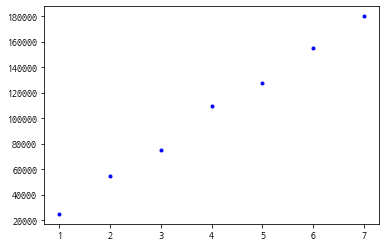

In [13]:
import matplotlib.pyplot as plt

plt.plot(xData,yData,"b.")

난수 발생

In [3]:
a = tf.Variable(tf.random_uniform([1], -100, 100))
b = tf.Variable(tf.random_uniform([1], -100, 100))
print('a = {}, b = {}'.format(a, b))

a = <tf.Variable 'Variable:0' shape=(1,) dtype=float32_ref>, b = <tf.Variable 'Variable_1:0' shape=(1,) dtype=float32_ref>


In [4]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

print('a = {}, b = {}'.format(sess.run(a), sess.run(b)))

a = [-70.54088], b = [81.46443]


placeholder 선언

In [5]:
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

가설 및 비용(오차) 함수 정의

In [6]:
Y = a * x + b

cost = tf.reduce_mean(tf.square(Y - y))

경사하강법

In [7]:
# 경사 하강 알고리즘의 학습율을 설정
learning_rate = tf.Variable(0.01)

train = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

학습

In [8]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for i in range(5001):
    sess.run(train, feed_dict={x: xData, y: yData})
    
    if i % 500 == 0:
        # i, 오차, 기울기, y절편
        print('{0:4d} {1:13.2f} {2:10.2f} {3:10.2f}'.format(i, 
                        sess.run(cost, feed_dict={x: xData, y: yData}),
                        sess.run(a)[0],
                        sess.run(b)[0]))
# 초기 데이터에 따른 Y = a * x + b 방정식 최적의 기울기(a)와 y절편(b)을 찾았다.

   0 4571622400.00   10427.06    1984.97
 500    8684306.00   25540.25    1936.68
1000    8633745.00   25627.90    1502.62
1500    8632674.00   25640.68    1439.37
2000    8632655.00   25642.54    1430.14
2500    8632654.00   25642.81    1428.81
3000    8632651.00   25642.84    1428.63
3500    8632656.00   25642.85    1428.61
4000    8632656.00   25642.85    1428.61
4500    8632656.00   25642.85    1428.61
5000    8632656.00   25642.85    1428.61


결과 출력

In [9]:
for i in range(8, 25):
    print('{0:2d}시간 근무를 했을 때 하루 매출 기대금액 : {1:8,.0f}원'.format(i, sess.run(Y, feed_dict={x: [i]})[0]))

 8시간 근무를 했을 때 하루 매출 기대금액 :  206,571원
 9시간 근무를 했을 때 하루 매출 기대금액 :  232,214원
10시간 근무를 했을 때 하루 매출 기대금액 :  257,857원
11시간 근무를 했을 때 하루 매출 기대금액 :  283,500원
12시간 근무를 했을 때 하루 매출 기대금액 :  309,143원
13시간 근무를 했을 때 하루 매출 기대금액 :  334,786원
14시간 근무를 했을 때 하루 매출 기대금액 :  360,428원
15시간 근무를 했을 때 하루 매출 기대금액 :  386,071원
16시간 근무를 했을 때 하루 매출 기대금액 :  411,714원
17시간 근무를 했을 때 하루 매출 기대금액 :  437,357원
18시간 근무를 했을 때 하루 매출 기대금액 :  463,000원
19시간 근무를 했을 때 하루 매출 기대금액 :  488,643원
20시간 근무를 했을 때 하루 매출 기대금액 :  514,286원
21시간 근무를 했을 때 하루 매출 기대금액 :  539,928원
22시간 근무를 했을 때 하루 매출 기대금액 :  565,571원
23시간 근무를 했을 때 하루 매출 기대금액 :  591,214원
24시간 근무를 했을 때 하루 매출 기대금액 :  616,857원
